In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset,random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torch.optim as optim
from NN_class import ConvNeuralNet

# Device configuration

In [2]:
BATCH_SIZE = 64
NUM_CLASSES = 7
LEARNING_RATE = 0.01
EPOCHS_NUM = 25

In [3]:
device = torch.device('cpu')

augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(size=64, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # Normalize
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

dataset = ImageFolder(root='C:/Diploma/classification_dataset', transform=augmentation_transforms)

train_size = int(0.85 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

test_dataset.dataset.transform = test_transforms  # Update transform for the test dataset

BATCH_SIZE = 64

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)


print(f"Classes: {dataset.classes}")
print(f"Total samples: {len(dataset)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")


Classes: ['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k']
Total samples: 14317
Training samples: 12169
Testing samples: 2148


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3562452..1.3099698].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9069169..0.8469853].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15656772..1.6417668].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2019196..2.0876198].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4182549..1.8172374].



Displaying first 10 samples from Training Dataset:
label: 4, class: 6. Benign Keratosis-like Lesions (BKL) 2624
label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323
label: 4, class: 6. Benign Keratosis-like Lesions (BKL) 2624
label: 5, class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k
label: 5, class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k
label: 6, class: 8. Seborrheic Keratoses and other Benign Tumors - 1.8k


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3395875..2.2233143].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0445848..2.2039294].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2019196..0.90514].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3321412..1.6805366].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.3977785].


label: 2, class: 3. Atopic Dermatitis - 1.25k
label: 2, class: 3. Atopic Dermatitis - 1.25k
label: 0, class: 1. Eczema 1677
label: 1, class: 10. Warts Molluscum and other Viral Infections - 2103


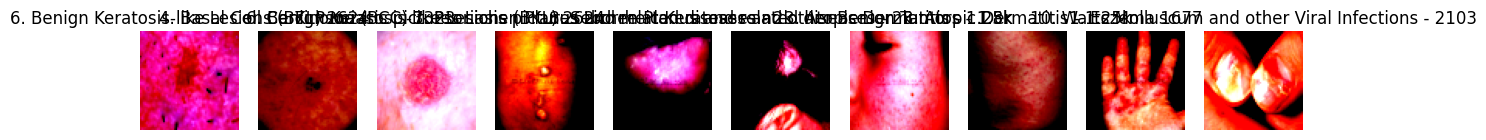

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.4220564].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..1.6805366].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4096808..1.4855624].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.378921..2.300854].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9727343..1.6999215].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..0.96329474].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657


Displaying first 10 samples from Testing Dataset:
label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323
label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323
label: 4, class: 6. Benign Keratosis-like Lesions (BKL) 2624
label: 0, class: 1. Eczema 1677
label: 6, class: 8. Seborrheic Keratoses and other Benign Tumors - 1.8k
label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323
label: 0, class: 1. Eczema 1677
label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323
label: 5, class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k
label: 0, class: 1. Eczema 1677


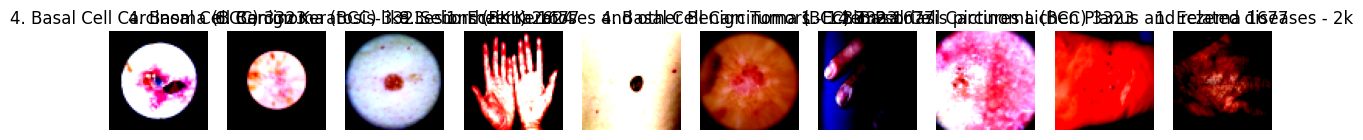

In [4]:
import matplotlib.pyplot as plt

print("\nDisplaying first 10 samples from Training Dataset:")
plt.figure(figsize=(15, 5))

for i in range(10):
    image, label = train_dataset[i]  
    class_name = train_dataset.dataset.classes[label]
    print(f"label: {label}, class: {class_name}")

    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy())  # Convert tensor to image format
    plt.title(class_name)
    plt.axis('off')

plt.show()

print("\nDisplaying first 10 samples from Testing Dataset:")
plt.figure(figsize=(15, 5))

for i in range(10):
    image, label = test_dataset[i]
    class_name = test_dataset.dataset.classes[label]
    print(f"label: {label}, class: {class_name}")
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy()) 
    plt.title(class_name)
    plt.axis('off') 

plt.show()

In [5]:
from NN_class import ConvNeuralNet

model = ConvNeuralNet(NUM_CLASSES)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [6]:
for epoch in range(EPOCHS_NUM):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, EPOCHS_NUM, loss.item()))

Epoch [1/25], Loss: 1.2413
Epoch [2/25], Loss: 1.6021
Epoch [3/25], Loss: 1.2994
Epoch [4/25], Loss: 0.9487
Epoch [5/25], Loss: 1.0009
Epoch [6/25], Loss: 1.0079
Epoch [7/25], Loss: 1.0289
Epoch [8/25], Loss: 0.6311
Epoch [9/25], Loss: 1.1046
Epoch [10/25], Loss: 0.5242
Epoch [11/25], Loss: 0.3833
Epoch [12/25], Loss: 0.6725
Epoch [13/25], Loss: 0.8288
Epoch [14/25], Loss: 0.4504
Epoch [15/25], Loss: 0.5874
Epoch [16/25], Loss: 0.7072
Epoch [17/25], Loss: 0.1503
Epoch [18/25], Loss: 0.2446
Epoch [19/25], Loss: 0.2744
Epoch [20/25], Loss: 0.0479
Epoch [21/25], Loss: 0.0990
Epoch [22/25], Loss: 0.2858
Epoch [23/25], Loss: 0.0733
Epoch [24/25], Loss: 0.7581
Epoch [25/25], Loss: 0.4489


In [13]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(len(dataset), 100 * correct / total))

Accuracy of the network on the 14317 train images: 94.2476785274057 %


In [15]:
torch.save(model.state_dict(), "classification_model.pth")
print("Model saved as 'classification_model.pth'")

Model saved as 'classification_model.pth'


In [12]:
model = ConvNeuralNet(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load("classification_model.pth"))
model.eval()

C:\Users\User\AppData\Local\Temp\ipykernel_49080\3210477645.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("classification_model.pth"))

ConvNeuralNet(
  (conv_layer1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=10816, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=7, bias=True)
)